In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import minmax_scale
from sklearn import cluster
from sklearn import decomposition
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)
%matplotlib inline
#matplotlib.rcParams.update({'font.size': 44})

In [2]:
excel_file = pd.ExcelFile('source_data.xlsx')

In [3]:
sheet0 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[0],
        skiprows=[0],
        header=1,
    )
sheet0 = sheet0[sheet0.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet0.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [4]:
sheet0.head()

,Region,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Белгородская область,23,21,27,23,19,16,16,14,15,16,NaN
1,Брянская область,20,19,20,23,24,17,23,21,21,22,NaN
2,Владимирская область,35,32,30,30,25,25,24,23,22,25,NaN
3,Воронежская область,57,65,66,60,58,58,59,57,56,53,NaN
4,Ивановская область,30,28,23,21,19,21,17,20,19,20,NaN


In [5]:
sheet1 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[1],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet1 = sheet1[sheet1.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet1.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [6]:
sheet2 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[2],
        skiprows=[0, 1],
        header=1,
    )
sheet2 = sheet2[sheet2.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet2.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [7]:
sheet3 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[3],
        skiprows=[0, 1],
        header=1,
    )
sheet3 = sheet3[sheet3.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet3.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [8]:
sheet4 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[4],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet4 = sheet4[sheet4.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet4.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [9]:
sheet5 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[5],
        skiprows=[0, 1],
        header=1,
    )
sheet5 = sheet5[sheet5.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet5.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [10]:
sheet6 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[6],
        skiprows=[0, 1, 2, 3, 4],
        header=1,
    )
sheet6 = sheet6[sheet6.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet6.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [11]:
sheet7 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[7],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet7 = sheet7[sheet7.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet7.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [12]:
sheet8 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[8],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet8 = sheet8[sheet8.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet8.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [13]:
sheet9 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[9],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet9 = sheet9[sheet9.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet9.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [14]:
sheet10 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[10],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet10 = sheet10[sheet10.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet10.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [15]:
sheet11 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[11],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet11 = sheet11[sheet11.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet11.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [16]:
sheet12 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[12],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet12 = sheet12[sheet12.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet12.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [17]:
sheet13 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[13],
        skiprows=[0, 1],
        header=1,
    )
sheet13 = sheet13[sheet13.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet13.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [18]:
sheet14 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[14],
        skiprows=[0, 1],
        header=1,
    )
sheet14 = sheet14[sheet14.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet14.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [19]:
sheet15 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[15],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet15 = sheet15[sheet15.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet15.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [20]:
sheet16 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[16],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet16 = sheet16[sheet16.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet16.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [21]:
sheet17 = pd.read_excel('source_data_1.xlsx')
sheet17 = sheet17[sheet17.columns.drop(['Unnamed: 11', 'ВНУТРЕННИЕ ЗАТРАТЫ НА НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ'])]
sheet17.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [22]:
list_of_df = []
list_of_df.append([sheet0, 'OrganizationNum'])
list_of_df.append([sheet1, 'StaffNum'])
list_of_df.append([sheet2, 'PhDNum'])
list_of_df.append([sheet3, 'Ph.DNum'])
list_of_df.append([sheet4, 'PostgraduateNum'])
list_of_df.append([sheet5, 'DoctoralNum'])
list_of_df.append([sheet6, 'PatentNum'])
list_of_df.append([sheet7, 'UsefulPatentsNum'])
list_of_df.append([sheet8, 'CreatedTechnologyNum'])
list_of_df.append([sheet9, 'UsefulTechnologyNum'])
list_of_df.append([sheet10, 'ProportionOfOrganizationsToUseInternet'])
list_of_df.append([sheet11, 'ProportionOfInnovativeOrgainzations'])
list_of_df.append([sheet12, 'TechnologicalInnovationsCost'])
list_of_df.append([sheet13, 'AmountOfInnovativeProducts'])
list_of_df.append([sheet14, 'ProportionOfInnovativeProducts'])
list_of_df.append([sheet15, 'Population'])
list_of_df.append([sheet16, 'GrossProduct'])
list_of_df.append([sheet17, 'InternalCosts'])

In [23]:
for i, df_container in enumerate(list_of_df):
    df = df_container[0]
    list_of_df[i][0] = df[df.Region != 'ВСЕГО']    

In [24]:
merged_df_list = []
for year in range(2005, 2014):
    result_df, feature_name = list_of_df[0]
    result_df = result_df[['Region', year]]

    #result_df.rename_axis({year: feature_name} ,axis='columns', inplace=True)
    result_df = result_df.rename_axis({year: feature_name} ,axis='columns')
    
    merged_df_list.append(result_df)
    
    for i in range(1, 18):
        merged_df, feature_name = list_of_df[i]
        merged_df = merged_df[['Region', year]]
        #merged_df.rename_axis({year: feature_name} ,axis='columns', inplace=True)
        merged_df = merged_df.rename_axis({year: feature_name} ,axis='columns')
        merged_df_list[year - 2005] = pd.merge(
            merged_df_list[year - 2005],
            merged_df,
            on='Region')

In [25]:
def str_to_num(s):
    if isinstance(s, str):
        s = s.replace(',', '.')
        s1 = s.replace(',', '')
        if s1.isdigit():
            return float(s)
    return s

In [26]:
df0 = merged_df_list[0]

In [27]:
def detect_minus(x):
    if x == '-':
        print(x)
        return True
    return False

In [28]:
df0 = df0.applymap(str_to_num)
df0.set_value(36, 'PostgraduateNum', 0)

,Region,OrganizationNum,StaffNum,PhDNum,Ph.DNum,PostgraduateNum,DoctoralNum,PatentNum,UsefulPatentsNum,CreatedTechnologyNum,UsefulTechnologyNum,ProportionOfOrganizationsToUseInternet,ProportionOfInnovativeOrgainzations,TechnologicalInnovationsCost,AmountOfInnovativeProducts,ProportionOfInnovativeProducts,Population,GrossProduct,InternalCosts
0,Белгородская область,23,559,92,15,1003,36,77,45,16,550,48.0,8.7,1204.6,2206.9,1.5,1511,144987.8,245
1,Брянская область,20,1136,44,8,472,20,38,10,0,690,40.8,6.2,440.0,4461.4,11.3,1331,66692.3,249.7
2,Владимирская область,35,2337,297,52,606,16,118,46,11,1653,48.5,10.7,673.5,3390.6,4.0,1473,86926.8,1463.1
3,Воронежская область,57,6114,783,119,2347,65,449,70,11,1805,56.9,12.2,1733.9,6407.7,7.3,2314,133586.6,2140.4
4,Ивановская область,30,435,196,48,919,44,98,35,0,432,38.3,4.5,494.2,452.3,1.3,1100,44415.4,228.8
5,Калужская область,33,3495,787,205,366,1,113,58,4,2130,47.8,14.0,1020.1,2715.1,5.3,1014,70953.9,2362.9
6,Костромская область,8,71,18,2,438,0,42,19,1,1027,33.8,9.2,604.5,1523.5,4.8,709,44684.7,21.4
7,Курская область,23,713,66,24,960,18,125,59,1,1341,30.8,6.7,1080.2,1428.8,2.0,1184,86624.9,728.2
8,Липецкая область,10,49,43,27,0,0,81,10,0,646,50.4,11.6,927.3,6937.6,3.9,1181,145194.4,33.7
9,Московская область,206,30899,6456,1659,2740,63,1605,448,32,12771,58.1,10.0,7538.2,40005.3,9.7,6628,708062.1,21738.6


In [29]:
df0_names_row_numbers_map = [(i, name) for i, name in enumerate(df0['Region'])]
df0_names_columns_numbers_map = [(i, name) for i, name in enumerate(df0.columns)]

In [30]:
cluster_data = df0.values

In [31]:
cluster_data.dtype

dtype('O')

In [32]:
normalized_cluster_data = minmax_scale(cluster_data[:, 1:].astype('float'))

In [33]:
normalized_cluster_data.shape

(77, 18)

In [34]:
km = cluster.KMeans(n_clusters=3)

In [35]:
y_km = km.fit_predict(normalized_cluster_data)

In [36]:
#y_km

In [37]:
#y_km.shape

In [38]:
km.fit(normalized_cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
#km.labels_

In [40]:
#km.cluster_centers_

In [41]:
def get_axis_names(x_coord, y_coord, list_of_df):
    return {x_coord: list_of_df[x_coord][1], y_coord: list_of_df[y_coord][1]}

def draw_clusters(
    clusters_num,
    axes,
    X,
    y_km,
    x_coord,
    y_coord,
    markers,
    colors,
    centres_color='red',
    centres_marker='*',
    cluster_centers=None,
    region_names=None,
    axis_names=None,
    fontsize=24,
    region_s=300,
    centres_s = 200,
    xlim=(0, 1),
    ylim=(0, 1),
    legend_loc=2):
    for i in range(clusters_num):
        mask = y_km == i
        axes.scatter(
            X[mask, x_coord],
            X[mask, y_coord],
            s=300,
            c=colors[i],
            marker=markers[i],
            label="cluster %s" % i
        )
        
    if cluster_centers is not None:   
        axes.scatter(
            cluster_centers[:, x_coord],
            cluster_centers[:, y_coord],
            s=centres_s,
            marker=centres_marker,
            c=centres_color,
            label='centroids'
           )
    axes.legend(loc=legend_loc, prop={'size': fontsize})
    if axis_names:
        axes.set_xlabel(axis_names[x_coord])
        axes.set_ylabel(axis_names[y_coord])
    if region_names:
        for label, x, y in zip(region_names, X[:, x_coord], X[:, y_coord]):
            axes.annotate(
                label,
                xy=(x, y), xytext=(-20, 20),
                textcoords='offset points', ha='right', va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'),
                fontsize=fontsize)
    for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
                 axes.get_xticklabels() + axes.get_yticklabels()):
        item.set_fontsize(fontsize)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.grid()
    plt.show()

In [42]:
#y_km

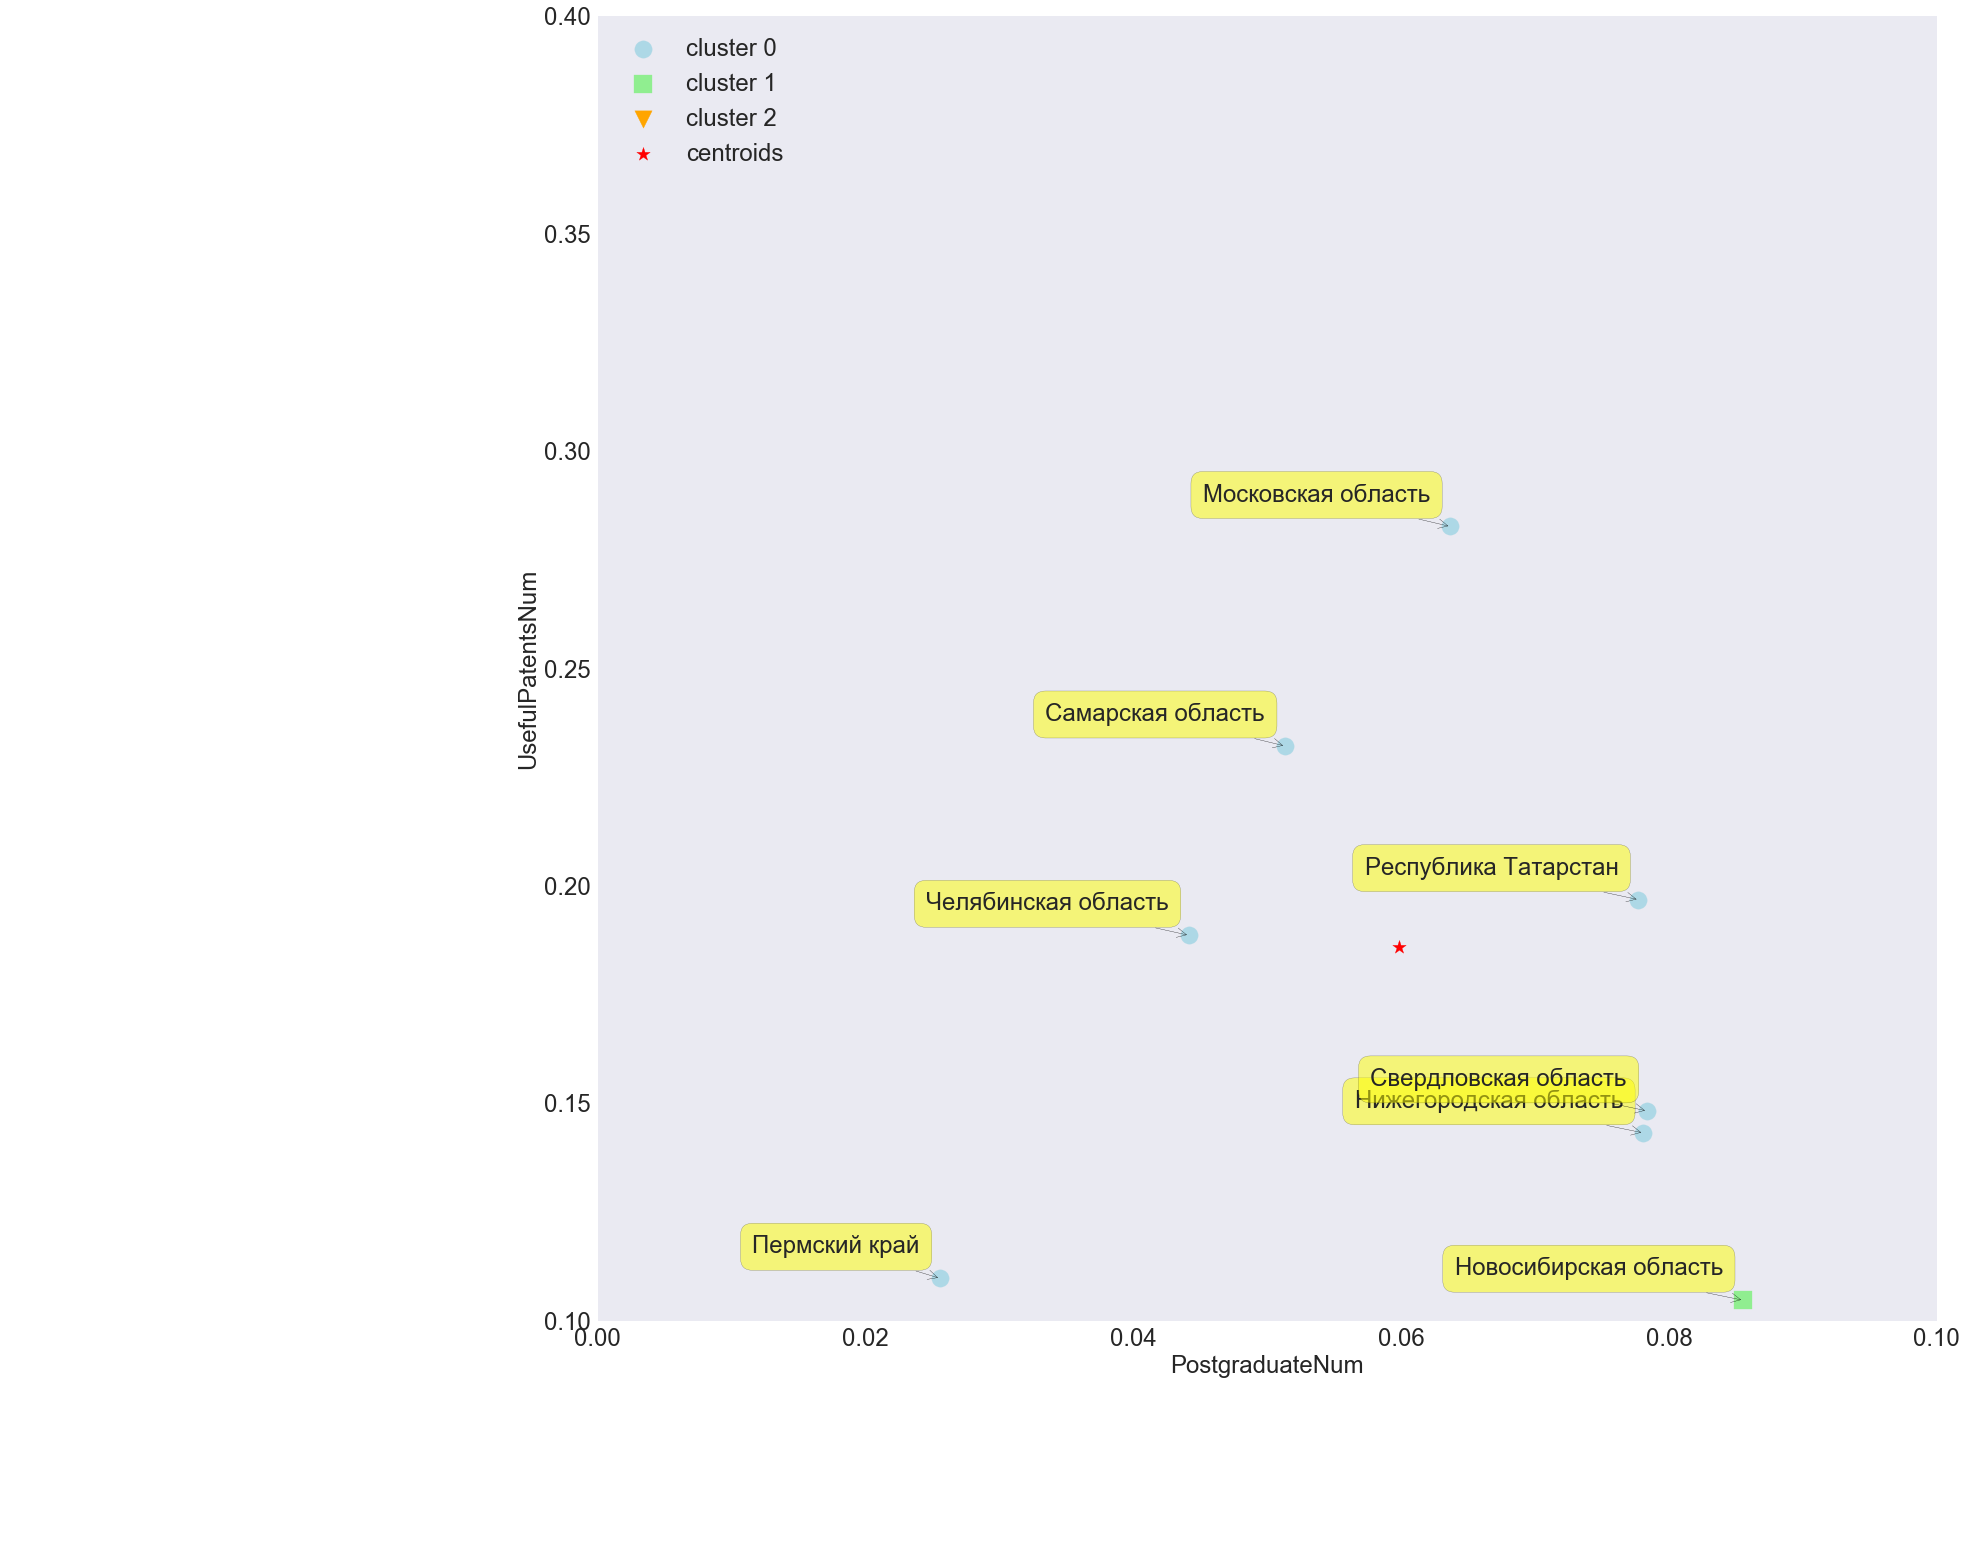

In [43]:
X = normalized_cluster_data

x_coord = 4
y_coord = 7

figure0 = plt.figure(figsize=(24, 24))

axes0 = figure0.add_subplot(111)
markers = ('o', 's', 'v')
colors = ('lightblue', 'lightgreen', 'orange')
axis_names = get_axis_names(x_coord, y_coord, list_of_df)
draw_clusters(
    3,
    axes0,
    X,
    y_km,
    4,
    7,
    markers,
    colors,
    xlim=(0.0, 0.1),
    ylim=(0.1, 0.4),
    axis_names=axis_names,
    cluster_centers=km.cluster_centers_,
    region_names = df0['Region'].tolist()
)

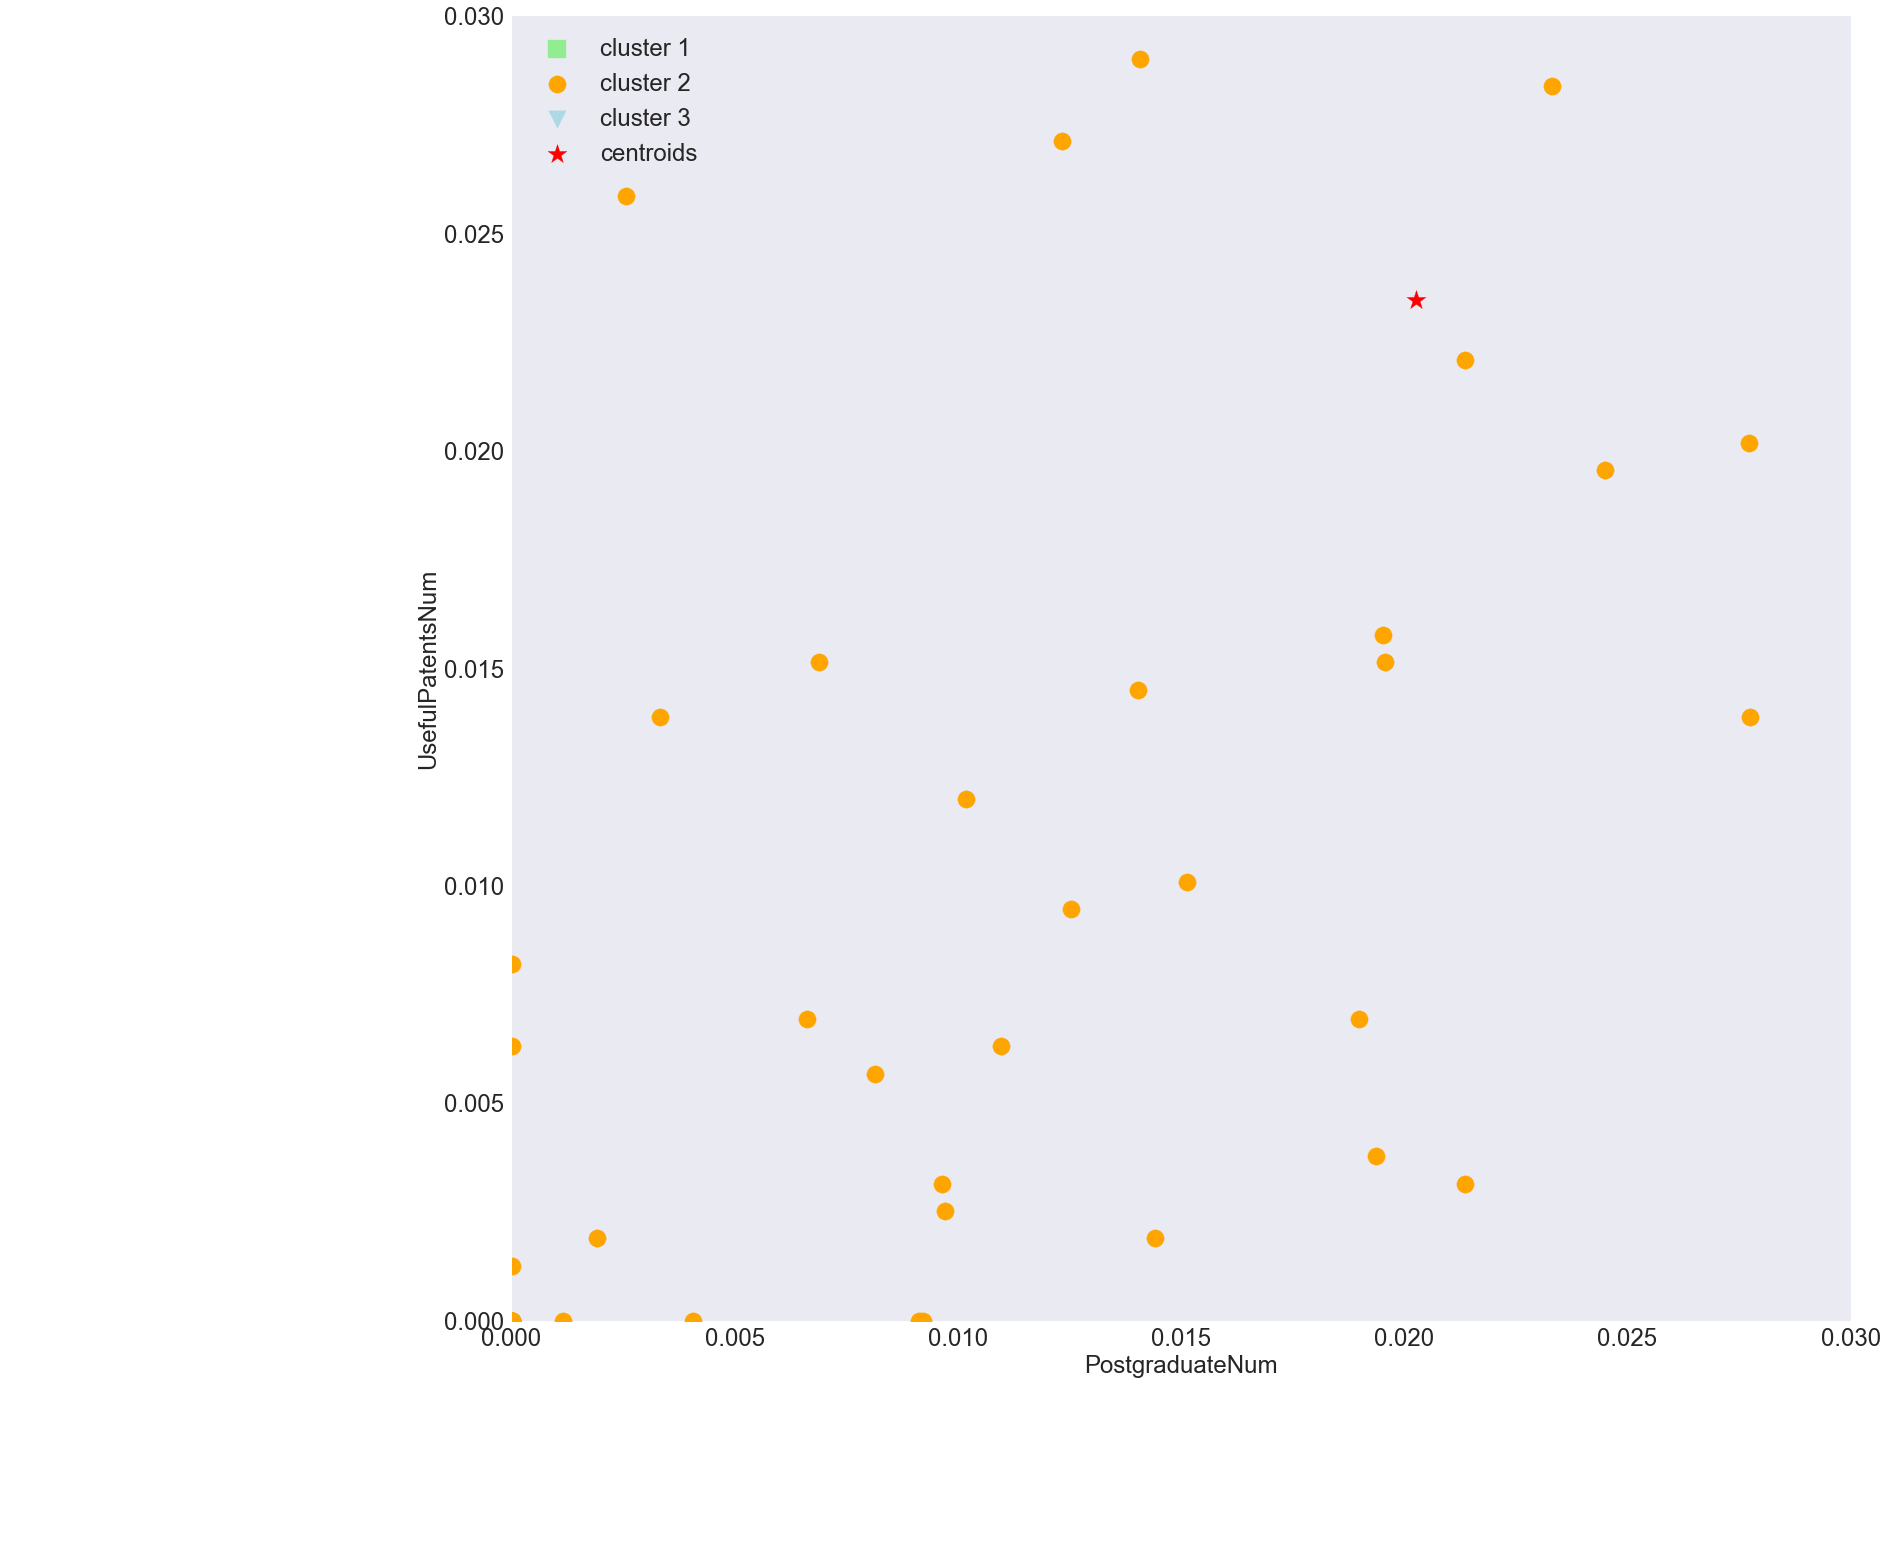

In [44]:
X = normalized_cluster_data

figure = plt.figure(figsize=(24, 24))

axes = figure.add_subplot(111)
axes.scatter(X[y_km == 0, 4],
            X[y_km == 0, 7],
            s=300,
            c='lightgreen',
            marker='s',
            label='cluster 1'
           )
#for i in range(X[y_km == 0].shape[0]):
#   axes.annotate(i, X[i, 4], X[i, 7])

#labels = ['point{0}'.format(i) for i in range(X[y_km == 0].shape[0])]
labels = df0['Region'][y_km == 0].tolist()

#plt.subplots_adjust(bottom = 0.1)
#plt.scatter(
#    data[:, 0], data[:, 1], marker='o', c=data[:, 2], s=data[:, 3] * 1500,
#    cmap=plt.get_cmap('Spectral'))

for label, x, y in zip(labels, X[y_km == 0, 4], X[y_km == 0, 7]):
    axes.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'), fontsize=24)

axes.scatter(X[y_km == 1, 4],
            X[y_km == 1, 7],
            s=300,
            c='orange',
            marker='o',
            label='cluster 2'
           )
axes.scatter(X[y_km == 2, 4],
            X[y_km == 2, 7],
            s=300,
            c='lightblue',
            marker='v',
            label='cluster 3'
           )
axes.scatter(km.cluster_centers_[:, 4],
            km.cluster_centers_[:, 7],
            s=400,
            marker='*',
            c='red',
            label='centroids'
           )
axes.set_xlabel(list_of_df[4][1])
axes.set_ylabel(list_of_df[7][1])
#axes.set_xlim([0, 600])
#axes.set_ylim([0, 600])

#axes.set_xlim([0, 0.1])
#axes.set_ylim([0, 0.3])

#axes.set_xlim([0, 0.1])
#axes.set_ylim([0, 0.1])

axes.set_xlim([0, 0.03])
axes.set_ylim([0, 0.03])

#axes.set_xlim([0, 0.005])
#axes.set_ylim([0, 0.005])

#axes.set_xlim([0, 0.001])
#axes.set_ylim([0, 0.001])
for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
             axes.get_xticklabels() + axes.get_yticklabels()):
    item.set_fontsize(24)
axes.legend(loc=2, prop={'size':24})
axes.grid()

plt.show()

In [45]:
trace = go.Scatter(
    x=X[:, 4],
    y=X[:, 7],
    mode='markers',
    name='Depense useful patents num from postgraduate num'
)
data = [trace]
layout = {'title': 'Clusters visualisation'}
plotly_fig = go.Figure(data=data, layout=layout)
iplot(plotly_fig, show_link=False)

In [46]:
print(X[y_km == 0].shape[0], X[y_km == 1].shape[0], X[y_km == 2].shape[0]) 

7 69 1


In [47]:
#X[y_km == 2]
#df0['Region'][y_km == 0]

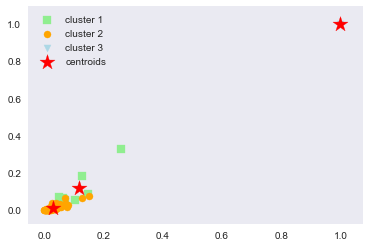

In [48]:
X = normalized_cluster_data
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1'
           )
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2'
           )
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3'
           )
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids'
           )
plt.legend()
plt.grid()
plt.show()

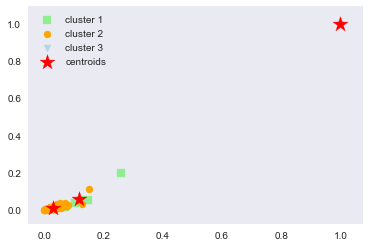

In [49]:
X = normalized_cluster_data
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 2],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1'
           )
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 2],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2'
           )
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 2],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3'
           )
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 2],
            s=250,
            marker='*',
            c='red',
            label='centroids'
           )
plt.legend()
plt.grid()
plt.show()

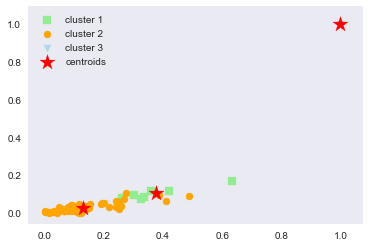

In [50]:
X = normalized_cluster_data
plt.scatter(X[y_km == 0, 15],
            X[y_km == 0, 16],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1'
           )
plt.scatter(X[y_km == 1, 15],
            X[y_km == 1, 16],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2'
           )
plt.scatter(X[y_km == 2, 15],
            X[y_km == 2, 16],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3'
           )
plt.scatter(km.cluster_centers_[:, 15],
            km.cluster_centers_[:, 16],
            s=250,
            marker='*',
            c='red',
            label='centroids'
           )
plt.legend()
plt.grid()
plt.show()

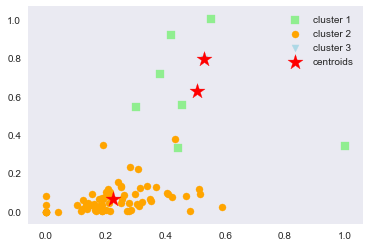

In [51]:
X = normalized_cluster_data
plt.scatter(X[y_km == 0, 11],
            X[y_km == 0, 12],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1'
           )
plt.scatter(X[y_km == 1, 11],
            X[y_km == 1, 12],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2'
           )
plt.scatter(X[y_km == 2, 11],
            X[y_km == 2, 12],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3'
           )
plt.scatter(km.cluster_centers_[:, 11],
            km.cluster_centers_[:, 12],
            s=250,
            marker='*',
            c='red',
            label='centroids'
           )
plt.legend()
plt.grid()
plt.show()

In [52]:
#df0_names_row_numbers_map

In [53]:
#df0_names_columns_numbers_map

In [54]:
y_km_1 = km.predict(normalized_cluster_data)

In [55]:
#y_km_1

In [56]:
df0.var()

OrganizationNum                           8.495023e+03
StaffNum                                  1.270401e+08
PhDNum                                    1.427936e+07
Ph.DNum                                   1.670607e+06
DoctoralNum                               1.599555e+04
PatentNum                                 3.900249e+05
UsefulPatentsNum                          3.772189e+04
CreatedTechnologyNum                      2.086480e+02
UsefulTechnologyNum                       8.622874e+06
ProportionOfOrganizationsToUseInternet    2.471633e+02
Population                                2.562813e+06
GrossProduct                              2.251749e+11
dtype: float64

In [57]:
df0.std()

OrganizationNum                               92.168447
StaffNum                                   11271.206427
PhDNum                                      3778.804669
Ph.DNum                                     1292.519592
DoctoralNum                                  126.473496
PatentNum                                    624.519707
UsefulPatentsNum                             194.221227
CreatedTechnologyNum                          14.444652
UsefulTechnologyNum                         2936.473095
ProportionOfOrganizationsToUseInternet        15.721428
Population                                  1600.878841
GrossProduct                              474525.978682
dtype: float64

In [58]:
df0_drop_regions = df0[df0.columns.drop(['Region'])]

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

In [61]:
df0_scaled = pd.DataFrame(scaler.fit_transform(df0_drop_regions), columns=df0_drop_regions.columns)

In [62]:
#df0_scaled.var()

In [63]:
#df0_scaled.std()

In [64]:
df0_scaled.corr().round(2)

,OrganizationNum,StaffNum,PhDNum,Ph.DNum,PostgraduateNum,DoctoralNum,PatentNum,UsefulPatentsNum,CreatedTechnologyNum,UsefulTechnologyNum,ProportionOfOrganizationsToUseInternet,ProportionOfInnovativeOrgainzations,TechnologicalInnovationsCost,AmountOfInnovativeProducts,ProportionOfInnovativeProducts,Population,GrossProduct,InternalCosts
OrganizationNum,1.00,0.98,0.98,0.98,0.97,0.96,0.99,0.96,0.88,0.57,0.33,0.29,0.55,0.29,0.21,0.82,0.98,0.98
StaffNum,0.98,1.00,0.98,0.97,0.95,0.93,0.98,0.96,0.89,0.63,0.31,0.28,0.54,0.29,0.21,0.79,0.96,1.00
PhDNum,0.98,0.98,1.00,1.00,0.98,0.96,0.98,0.94,0.83,0.49,0.32,0.22,0.46,0.21,0.14,0.73,0.98,0.99
Ph.DNum,0.98,0.97,1.00,1.00,0.98,0.96,0.97,0.93,0.82,0.46,0.31,0.21,0.44,0.19,0.13,0.71,0.98,0.98
PostgraduateNum,0.97,0.95,0.98,0.98,1.00,0.99,0.96,0.94,0.83,0.46,0.33,0.26,0.48,0.23,0.17,0.75,0.98,0.96
DoctoralNum,0.96,0.93,0.96,0.96,0.99,1.00,0.95,0.92,0.81,0.44,0.35,0.31,0.50,0.24,0.18,0.76,0.96,0.94
PatentNum,0.99,0.98,0.98,0.97,0.96,0.95,1.00,0.97,0.85,0.56,0.34,0.29,0.55,0.31,0.23,0.84,0.98,0.98
UsefulPatentsNum,0.96,0.96,0.94,0.93,0.94,0.92,0.97,1.00,0.89,0.61,0.32,0.34,0.67,0.47,0.35,0.83,0.96,0.97
CreatedTechnologyNum,0.88,0.89,0.83,0.82,0.83,0.81,0.85,0.89,1.00,0.75,0.24,0.34,0.62,0.40,0.29,0.77,0.84,0.89
UsefulTechnologyNum,0.57,0.63,0.49,0.46,0.46,0.44,0.56,0.61,0.75,1.00,0.18,0.39,0.57,0.37,0.28,0.67,0.50,0.60


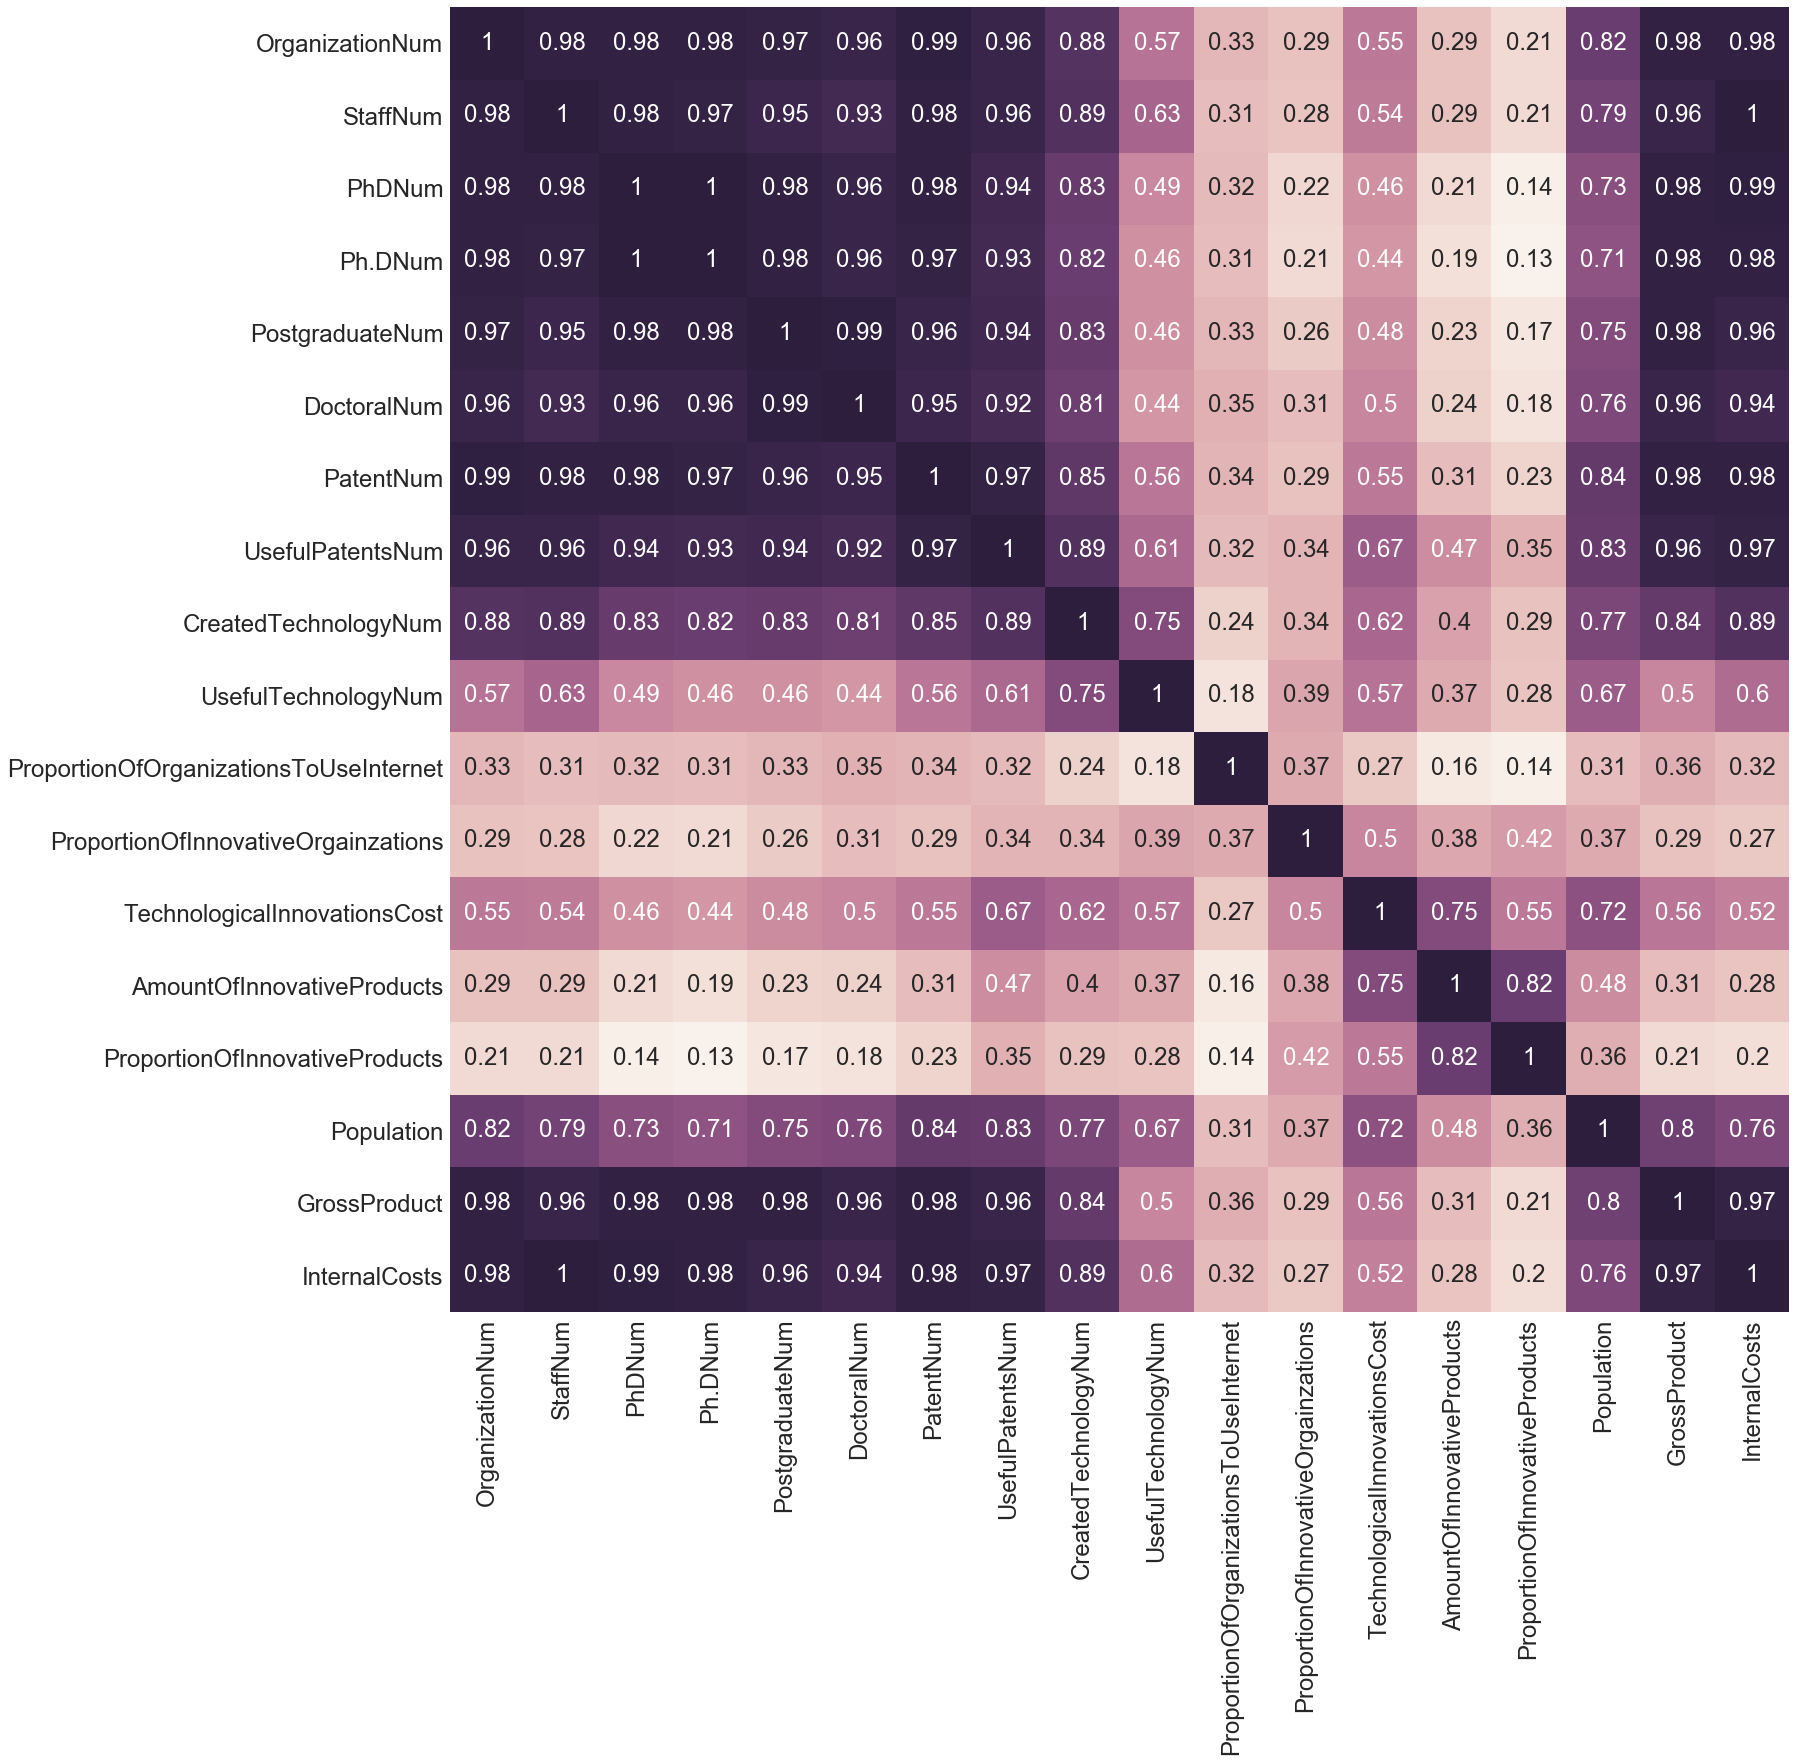

In [79]:
plt.figure(figsize=(24, 24))
#sns.set_context(font_scale=8)
heatmap_fig = sns.heatmap(df0_scaled.corr().round(2), annot=True, annot_kws={"size":24}, cbar=False)
for item in heatmap_fig.get_xticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_yticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_label():
    item.set_fontsize(24)

In [66]:
#sns.pairplot?